## Optional lab: Cost function and Logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data set

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) # (m, n)
y_train = np.array([0, 0, 0, 1, 1, 1])             # (m,)

In [9]:
def plot_data(X_train, y_train, ax):
    colors = np.array(['red', 'blue'])
    ax.scatter(X_train[:, 0], X_train[:, 1], c = colors[y_train], s = 100, edgecolor='k')
    for i in range(2):
        ax.scatter([], [], c = colors[i], label = f'y = {i}')
    ax.set_ylabel('$x_1$', fontsize=12)
    ax.set_xlabel('$x_0$', fontsize=12)
    ax.legend();

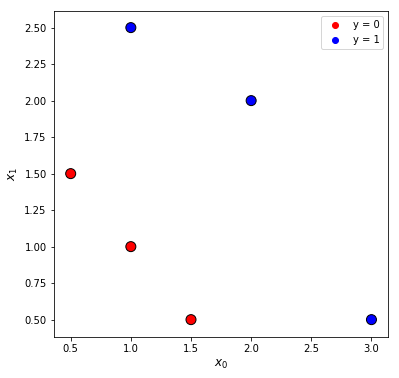

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_data(X_train, y_train, ax)

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

#### Code Description

The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example and accumulating the total.


In [4]:
def compute_cost_logistic(X, y, w, b):
    
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = 1/(1 + np.exp(-z_i))
        cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1-f_wb_i)
    return cost / m

Check the implementation of the cost function using the cell below.

In [5]:
w_tmp = np.array([1, 1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


**Expected output**: 0.3668667864055175

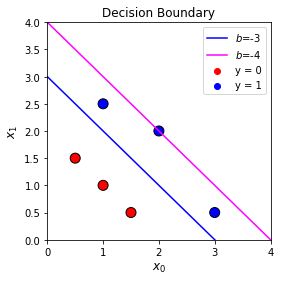

In [11]:
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="blue", label="$b$=-3")
ax.plot(x0,x1_other, c="magenta", label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

You can see from this plot that `b = -4, w = np.array([1,1])` is a worse model for the training data. Let's see if the cost function implementation reflects this.

In [12]:
w_array1 = np.array([1, 1])
b_1 = -3
w_array2 = np.array([1, 1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


**Expected output**

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`